***This notebook aims to determine in which fields the organizations win a nobel prize compared to the fields in which the prize is won by individuals.***

For this matter, we first clean the data, then we group the records based on the laureate type (individual or organization) and finally plot the categories versus the laureate type.

We start by reading the csv file (after cleaning) after importing all the possible needed modules.

In [3]:
import pandas as pd
import numpy as np
import datetime # to handle date/time attributes
from os import listdir # os is a module for interacting with the OS
from os.path import isfile, join # to verify file object, and concatenate paths
import glob # to find pathnames matching a specific pattern
import re # regular expressions 
import matplotlib as mpl
import matplotlib.pyplot as plt


df = pd.read_csv("new_nobel.csv")
df

,Unnamed: 0,Year,Category,Prize Share,Laureate ID,Laureate Type,FullName,BirthDate,Birth City,Birth Country,Sex,OrganizationName,OrganizationCountry
0,0,1901,Chemistry,1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Germany
1,1,1901,Literature,1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Not Applicable,Not Applicable
2,2,1901,Medicine,1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Germany
3,3,1901,Peace,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Not Applicable,Not Applicable
4,4,1901,Peace,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Not Applicable,Not Applicable
5,5,1901,Physics,1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Germany
6,6,1902,Chemistry,1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Germany
7,7,1902,Literature,1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,Not Applicable,Not Applicable
8,8,1902,Medicine,1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,United Kingdom
9,9,1902,Peace,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,Not Applicable,Not Applicable


We drop the extra column that is added when we save the new csv file.

In [4]:
df = df.drop(df.columns[0] ,  axis='columns')
df

,Year,Category,Prize Share,Laureate ID,Laureate Type,FullName,BirthDate,Birth City,Birth Country,Sex,OrganizationName,OrganizationCountry
0,1901,Chemistry,1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Germany
1,1901,Literature,1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Not Applicable,Not Applicable
2,1901,Medicine,1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Germany
3,1901,Peace,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Not Applicable,Not Applicable
4,1901,Peace,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Not Applicable,Not Applicable
5,1901,Physics,1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Germany
6,1902,Chemistry,1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Germany
7,1902,Literature,1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,Not Applicable,Not Applicable
8,1902,Medicine,1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,United Kingdom
9,1902,Peace,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,Not Applicable,Not Applicable


The dataframe is grouped based on the ***'Laureate Type'*** column. After this step, the dataframe is divided into 2, the only values for the ***'laureate type'*** that are **Organization** and **Individual**. 

To have an insight about the result of this ***groupby***, we display the records with a ***Laureate Type=Organization*** with its corresponding ***Category***. 


In [8]:
df.groupby(['Laureate Type']).size()

tmp = df.loc[df['Laureate Type'] == 'Organization']
tmp[['Category', 'Laureate Type']]

,Category,Laureate Type
24,Peace,Organization
61,Peace,Organization
90,Peace,Organization
206,Peace,Organization
222,Peace,Organization
244,Peace,Organization
245,Peace,Organization
295,Peace,Organization
365,Peace,Organization
366,Peace,Organization


After the run of the previous cell, we find out that the ***organizations do not tend to win a Nobel Prize but when they do, the category turns out to be 'Peace'***.


The following step consists of visualizing this finding. We aim to see over the fields of the Nobel prize how the distribution is done between the individual and organizational winners.

In order to do so, we create a new boolean column called ***isOrg*** that holds the value true is the ***Laureate Type*** is ***Organization*** and false when it is ***Individual***. This column is used to visualize the type of the winner in a stacked bar chart.

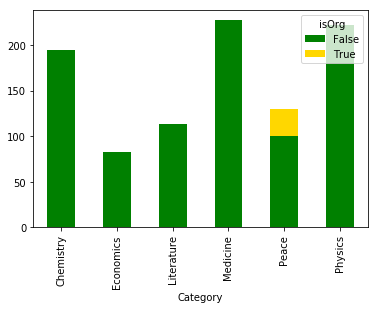

In [9]:
df['isOrg'] = df[['Laureate Type']] != 'Individual'

#bins1 = [1900, 1910, 1920, 1930, 1940, 1950, 1960,1970, 1980, 1990, 2000, 2010, 2020]
#labels1 = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

#df['decade'] = pd.cut(df['Year'], bins =bins1, labels =labels1)


#df
gender_ratio_time = pd.crosstab([df.Category], df.isOrg.astype(bool))
gender_ratio_time.plot(kind='bar', stacked=True, color=['green','gold'], grid=False)



***The major finding is that the organizations are less likely to win a Nobel prize but when they do win it is in the Peace field according to our records.***
